In [1]:
import modules
from modules.preprocessing import read_zip

In [144]:
from importlib import reload

import gc
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reload(modules.preprocessing)
from modules.preprocessing import read_zip, df_json_convert, show_json_example
from modules.preprocessing import timestamp_to_str, return_year, return_month, return_day, return_date, return_hour

In [3]:
PATH_TO_DATA = 'data/all.zip'

In [4]:
pd.set_option('max_columns', 100)

In [5]:
train = read_zip(PATH_TO_DATA, 'train.csv')

/home/kirill/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
train.head(2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


In [7]:
for col in ['device', 'geoNetwork', 'totals', 'trafficSource']:
    print(col)
    show_json_example(train[col][1], 'not available in demo dataset')
    print('-'*10)

device
browser: Firefox
operatingSystem: Macintosh
isMobile: False
deviceCategory: desktop
----------
geoNetwork
continent: Oceania
subContinent: Australasia
country: Australia
networkDomain: dodo.net.au
----------
totals
visits: 1
hits: 1
pageviews: 1
bounces: 1
newVisits: 1
----------
trafficSource
campaign: (not set)
source: google
medium: organic
keyword: (not provided)
adwordsClickInfo: {'criteriaParameters': 'not available in demo dataset'}
----------


In [151]:
train.groupby('sessionId').size()[train.groupby('sessionId').size()>1].head(1)

sessionId
0011338928267756760_1471848731    2
dtype: int64

In [157]:
train.groupby('sessionId').size()[train.groupby('sessionId').size()>2]

Series([], dtype: int64)

In [148]:
train[train.sessionId=='0011338928267756760_1471848731'].sort_values('date')

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,start_time,year,month,day,my_date,hour
212026,Organic Search,20160821,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471848731,2016-08-22 06:52:11,2016,8,22,20160822,6
82177,Organic Search,20160822,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471849330,2016-08-22 07:02:10,2016,8,22,20160822,7


In [146]:
train['start_time'] = timestamp_to_str(train.visitStartTime)
train['year'] = return_year(train.visitStartTime)
train['month'] = return_month(train.visitStartTime)
train['day'] = return_day(train.visitStartTime)
train['my_date'] = return_date(train.visitStartTime)
train['hour'] = return_hour(train.visitStartTime)

In [127]:
train['diff_days'] = train['start_time'].apply(lambda x: x.date()) - train.date.apply(str).apply(lambda x: datetime.strptime(x, '%Y%m%d').date()) 

In [129]:
train['diff_days'] = train['diff_days'].apply(lambda x: x.days)

In [134]:
train[train.diff_days>1]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,start_time,year,month,day,my_date,diff_days


In [140]:
train.drop('diff_days', axis=1, inplace=True)

In [147]:
gc.collect()

14

In [149]:
train[train.sessionId=='0011338928267756760_1471848731'].sort_values('date')

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,start_time,year,month,day,my_date,hour
212026,Organic Search,20160821,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471848731,2016-08-22 06:52:11,2016,8,22,20160822,6
82177,Organic Search,20160822,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471849330,2016-08-22 07:02:10,2016,8,22,20160822,7


In [163]:
group = train.groupby('sessionId').size()
group = train[train.sessionId.isin(group[group==2].index)].sort_values(['sessionId', 'date'])

In [164]:
group

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,start_time,year,month,day,my_date,hour
212026,Organic Search,20160821,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471848731,2016-08-22 06:52:11,2016,8,22,20160822,6
82177,Organic Search,20160822,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471849330,2016-08-22 07:02:10,2016,8,22,20160822,7
848579,Referral,20161231,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",14884852016449602,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0014884852016449602_1483257533,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1483257533,2,1483257533,2017-01-01 07:58:53,2017,1,1,20170101,7
802549,Referral,20170101,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",14884852016449602,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0014884852016449602_1483257533,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""10"", ""pageviews"": ""6""}","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1483257533,2,1483257729,2017-01-01 08:02:09,2017,1,1,20170101,8
428607,Organic Search,20170605,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0019612470994343873,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0019612470994343873_1496731675,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""14"", ""pageviews"": ""14""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1496731675,24,1496731675,2017-06-06 06:47:55,2017,6,6,20170606,6
202287,Organic Search,20170606,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",19612470994343873,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0019612470994343873_1496731675,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1496731675,24,1496732439,2017-06-06 07:00:39,2017,6,6,20170606,7
46654,Paid Search,20170519,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0031542961723593073,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0031542961723593073_1495261490,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""37"", ""pageviews"": ""32...","{""campaign"": ""AW - Accessories"", ""source"": ""go...",1495261490,1,1495261490,2017-05-20 06:24:50,2017,5,20,20170520,6
857846,Paid Search,20170520,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",31542961723593073,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0031542961723593073_1495261490,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""AW - Accessories"", ""source"": ""go...",1495261490,1,1495264358,2017-05-20 07:12:38,2017,5,20,20170520,7
618667,Referral,20170124,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",39798900163330977,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",0039798900163330977_1485331011,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5""}","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1485331011,4,1485331011,2017-01-25 07:56:51,2017,1,25,20170125,7
520542,Referral,20170125,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0039798900163330977,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",0039798900163330977_1

In [6]:
train = df_json_convert(train, ['device', 'geoNetwork', 'totals', 'trafficSource'])

In [7]:
train.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [8]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')

In [9]:
gdf = train.groupby('fullVisitorId')["totals.transactionRevenue"].sum().reset_index()

In [10]:
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,5103959234087,0.0
1,10278554503158,0.0
2,20424342248747,0.0
3,27376579751715,0.0
4,33471059618621,0.0


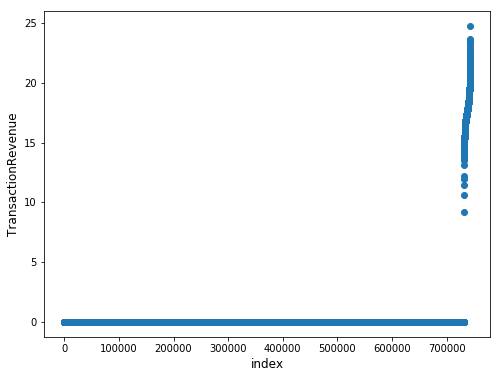

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

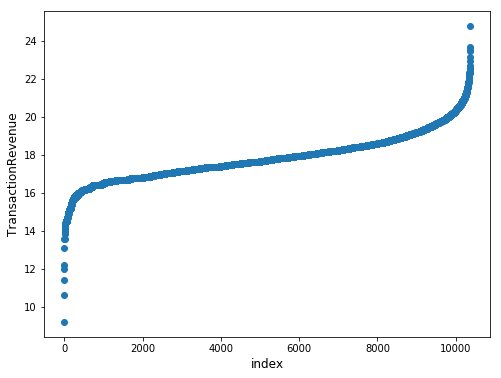

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf[gdf["totals.transactionRevenue"]>0].shape[0]),
            np.sort(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

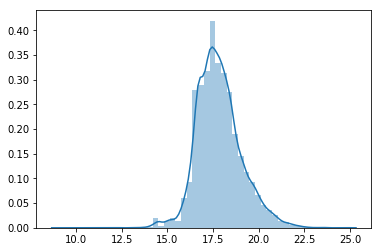

In [13]:
sns.distplot(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values))

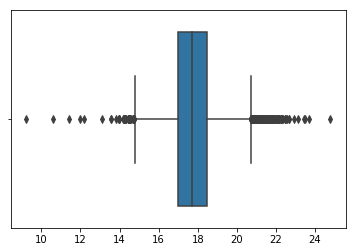

In [14]:
sns.boxplot(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values))

In [15]:
drop_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1]
drop_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [16]:
train.drop(drop_cols, axis=1, inplace=True)

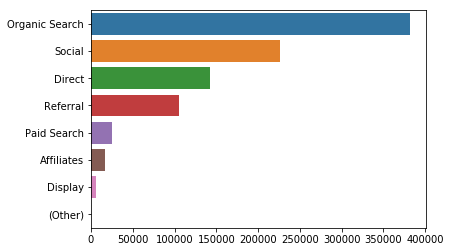

In [17]:
sns.barplot(y=train.channelGrouping.value_counts().index, x=train.channelGrouping.value_counts().values)
plt.show()

___